## 数据读取

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [122]:
data_root = "./pre"
# load data
# dfTrain = pd.read_csv("%s/train.csv"%data_root)
# dfTest = pd.read_csv("%s/test.csv"%data_root)
# dfAd = pd.read_csv("%s/ad.csv"%data_root)
# dfAppCat = pd.read_csv("%s/app_categories.csv"%data_root)
dfUser = pd.read_csv("%s/user.csv"%data_root)
# dfPosition = pd.read_csv("%s/position.csv"%data_root)
# dfUserAppActions = pd.read_csv("%s/user_app_actions.csv"%data_root)
# dfUserInstallApps = pd.read_csv("%s/user_installedapps.csv"%data_root)

In [3]:
dfTrain.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
0,0,170000,NaN,3089,2798058,293,1,1
1,0,170000,NaN,1259,463234,6161,1,2
2,0,170000,NaN,4465,1857485,7434,4,1
3,0,170000,NaN,1004,2038823,977,1,1
4,0,170000,NaN,1887,2015141,3688,1,1


In [4]:
dfAd.head()

,creativeID,adID,camgaignID,advertiserID,appID,appPlatform
0,4079,2318,147,80,14,2
1,4565,3593,632,3,465,1
2,3170,1593,205,54,389,1
3,6566,2390,205,54,389,1
4,5187,411,564,3,465,1


In [6]:
dfAppCat.head()

,appID,appCategory
0,14,2
1,25,203
2,68,104
3,75,402
4,83,203


In [8]:
dfUser.head()

,userID,age,gender,education,marriageStatus,haveBaby,hometown,residence
0,1,42,1,0,2,0,512,503
1,2,18,1,5,1,0,1403,1403
2,3,0,2,4,0,0,0,0
3,4,21,2,5,3,0,607,607
4,5,22,2,0,0,0,0,1301


In [12]:
dfPosition.head()

,positionID,sitesetID,positionType
0,2150,1,0
1,2579,1,0
2,3322,1,0
3,5726,1,0
4,4522,2,0


In [15]:
dfUserAppActions.head()

,userID,installTime,appID
0,1,182032,933
1,5,141354,589
2,5,251727,565
3,5,260932,596
4,5,261318,536


In [16]:
dfUserInstallApps.head()

,userID,appID
0,1,357
1,1,360
2,1,362
3,1,365
4,1,375


## 数据探索 eda

In [17]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749528 entries, 0 to 3749527
Data columns (total 8 columns):
label               int64
clickTime           int64
conversionTime      float64
creativeID          int64
userID              int64
positionID          int64
connectionType      int64
telecomsOperator    int64
dtypes: float64(1), int64(7)
memory usage: 228.9 MB


上面的字段中， creativeID 是物品id， userId 用户id， positionID 是上下文id

我们先来看用户相关的特征

In [18]:
dfUser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805118 entries, 0 to 2805117
Data columns (total 8 columns):
userID            int64
age               int64
gender            int64
education         int64
marriageStatus    int64
haveBaby          int64
hometown          int64
residence         int64
dtypes: int64(8)
memory usage: 171.2 MB


![](http://static.zybuluo.com/zhuanxu/6hn6k2ha5lz13a0f2fht4rj2/image_1capo9uj31uul1tfmvr91vpm1lle9.png)

In [124]:
dfTrainUser = pd.merge(dfTrain,dfUser,on='userID')

## 年龄
先来看年龄字段，看缺失值有哪些，年龄的缺失率大概是10%

In [125]:
ageMean = dfTrainUser.groupby('age')['label'].agg(['mean','size'])

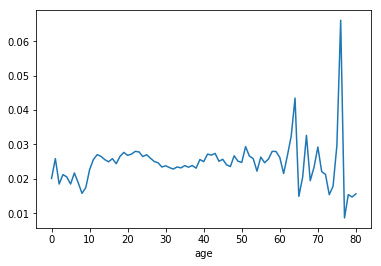

In [127]:
ageMean['mean'].plot()

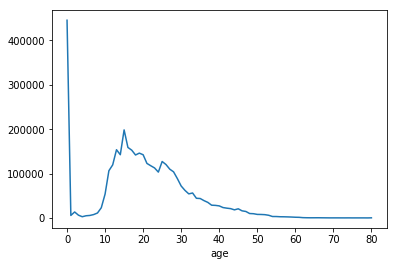

In [128]:
ageMean['size'].plot()

In [21]:
(dfUser.shape[0],dfUser[dfUser['age'] !=0].shape[0],dfUser[dfUser['age'] ==0].shape[0]/dfUser.shape[0])

(2805118, 2510847, 0.1049050342980224)

查看年龄的分布

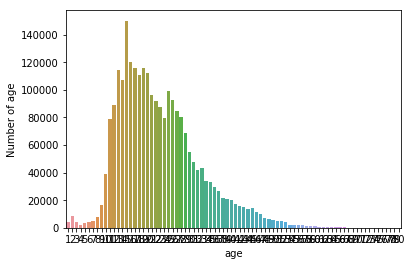

In [25]:
sns.countplot(dfUser[dfUser.age!=0].age);
plt.xlabel('age');
plt.ylabel('Number of age');

我们看到有1岁的和好多年级特别大的，我们来看下百分位数

In [79]:
dfUser[dfUser.age != 0]['age'].describe() # 我们的中位数是21，平均值23，我们取中位数

count    2.510847e+06
mean     2.277593e+01
std      9.675687e+00
min      1.000000e+00
25%      1.500000e+01
50%      2.100000e+01
75%      2.800000e+01
max      8.000000e+01
Name: age, dtype: float64

In [80]:
dfUser.loc[dfUser.age==0,'age'] = 21 # 取中位数

In [81]:
ulimitHigh = np.percentile(dfUser[dfUser.age!=0].age.values, 99)
ulimitLow = np.percentile(dfUser[dfUser.age!=0].age.values, 1)
(ulimitLow,ulimitHigh)

(7.0, 51.0)

下面我们对数据进行scale后再来看下的

In [82]:
dfUser.loc[(dfUser.age > 0) & (dfUser.age < ulimitLow),'age'] = ulimitLow

In [83]:
dfUser.loc[(dfUser.age > ulimitHigh),'age'] = ulimitHigh

In [84]:
dfUser['age'].describe()

count    2.805118e+06
mean     2.257603e+01
std      8.911395e+00
min      7.000000e+00
25%      1.600000e+01
50%      2.100000e+01
75%      2.700000e+01
max      5.100000e+01
Name: age, dtype: float64

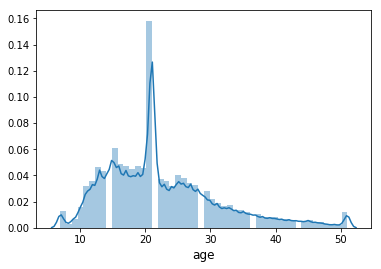

In [85]:
sns.distplot(dfUser.age.values, kde=True)
plt.xlabel('age', fontsize=12)
plt.show()

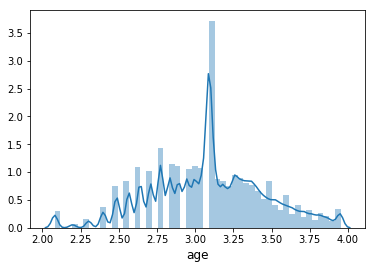

In [86]:
sns.distplot(np.log1p(dfUser.age.values), kde=True)
plt.xlabel('age', fontsize=12)
plt.show()

In [87]:
dfUser.gender.unique() # 0表示未知

array([1, 2, 0])

下面将train数据和user特征拼接

In [88]:
dfTrainUser = pd.merge(dfTrain,dfUser,on='userID')

In [89]:
dfTrainUser.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,age,gender,education,marriageStatus,haveBaby,hometown,residence
0,0,170000,NaN,3089,2798058,293,1,1,25.0,2,1,3,1,0,1301
1,0,170000,NaN,1259,463234,6161,1,2,20.0,2,1,1,0,0,213
2,0,251337,NaN,3307,463234,6161,1,2,20.0,2,1,1,0,0,213
3,0,260055,NaN,784,463234,6161,1,0,20.0,2,1,1,0,0,213
4,0,170000,NaN,4465,1857485,7434,4,1,16.0,1,1,0,0,0,1502


In [91]:
assert dfTrain.shape[0] == dfTrainUser.shape[0]

查看下 正负样本的比例

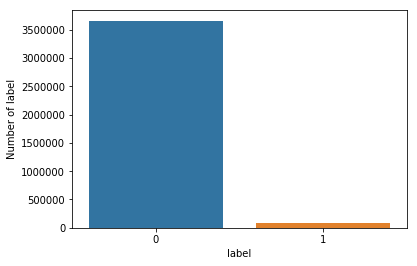

In [92]:
sns.countplot(dfTrain.label);
plt.xlabel('label');
plt.ylabel('Number of label');

下面要做的是查看不同的年龄对于评分是是否是线性关系

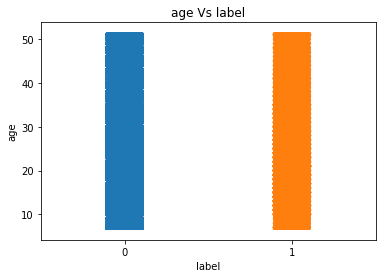

In [93]:
sns.stripplot(dfTrainUser["label"],dfTrainUser["age"],jitter=True)
plt.title("age Vs label");
# 可以说这么看话。分布都很均匀啊。

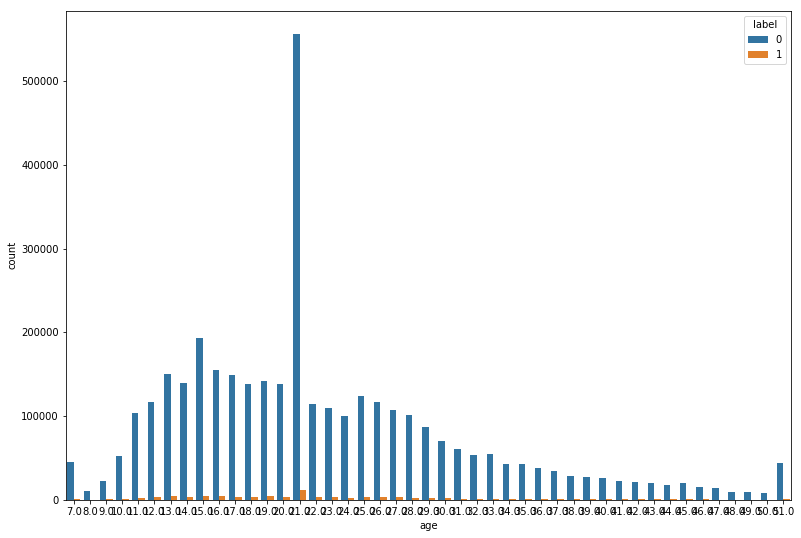

In [99]:
# plt.figure(figsize=(13,9))
# sns.countplot(x="age", hue="label",data=dfTrainUser);

我们应该统一下，不同年龄其点占比是什么样子的

In [104]:
ageMean = dfTrainUser.groupby('age')['label'].agg('mean')

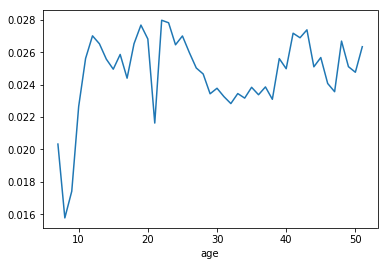

In [111]:
ageMean.plot()

我们可以看到年龄这个特征，我们不适合直接使用连续值，而是应该分段后做one-hot编码

## 性别

In [112]:
genderMean = dfTrainUser.groupby('gender')['label'].agg('mean')

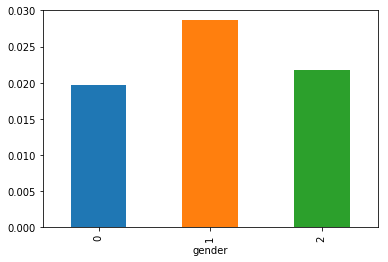

In [114]:
genderMean.plot(kind='bar')
# 取值包括男，女，未知是0。

我们可以看到不同性别对于转换率是有区别的，为了看对于未知性别0是否单独编码，我们来统计下缺失率

In [115]:
dfUser[dfUser.gender==0].shape[0] / dfUser.shape[0]

0.10163494013442571

In [116]:
dfUser[dfUser.gender==1].shape[0] / dfUser[dfUser.gender==2].shape[0]

1.270280107098713

男女比例相当，未知性别的大概为10%，所以建议是对于未知性别的也单独进行one-hot

## 学历(education)

In [118]:
eduMean = dfTrainUser.groupby('education')['label'].agg(['mean','size'])

In [119]:
eduMean.head()

,mean,size
education,,
0,0.020534,995655
1,0.023804,812895
2,0.029693,647057
3,0.027732,679183
4,0.024329,340623


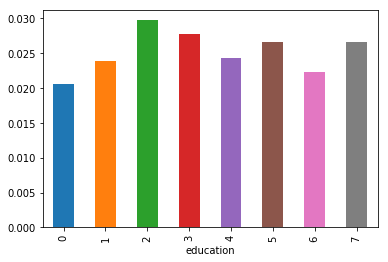

In [120]:
eduMean['mean'].plot('bar')

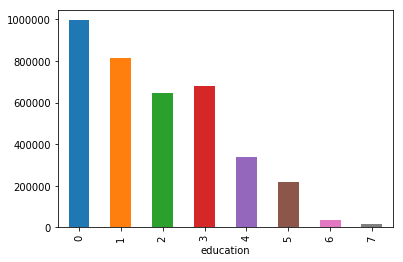

In [121]:
eduMean['size'].plot('bar')

学历one-hot，并且对于未知的也建模

## 婚恋状态(marriageStatus)

In [129]:
msMean = dfTrainUser.groupby('marriageStatus')['label'].agg(['mean','size'])

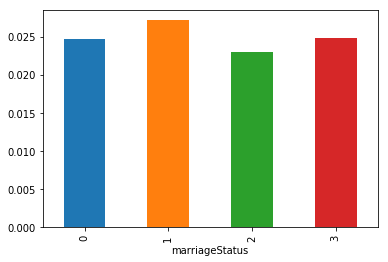

In [133]:
msMean['mean'].plot('bar')

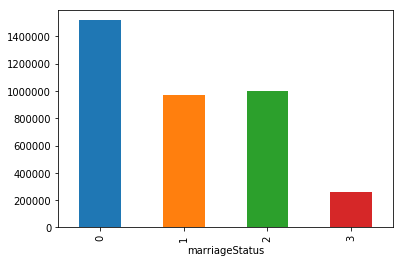

In [134]:
msMean['size'].plot('bar')

## 育儿状态(haveBaby)

In [135]:
hbMean = dfTrainUser.groupby('haveBaby')['label'].agg(['mean','size'])

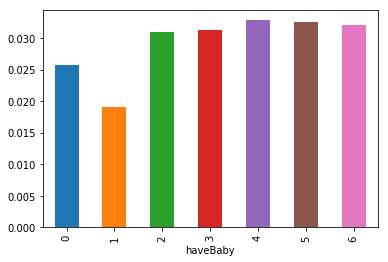

In [136]:
hbMean['mean'].plot('bar')

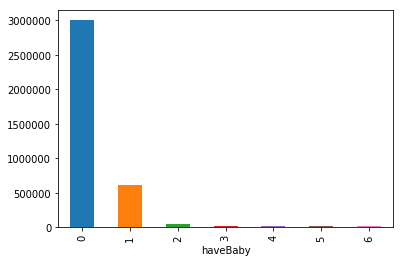

In [137]:
hbMean['size'].plot('bar')

## 家乡/籍贯(hometown)
用户出生地，取值具体到市级城市，使用二级编码，千位百位数表示省份，十位个位数表示省内城市，如1806表示省份编号为18，城市编号是省内的6号，编号0表示未知。

In [142]:
#省份处理
def process_province(hometown):
    hometown = str(hometown)
    province = int(hometown[0:2])
    return province

#城市处理
def process_city(hometown):
    hometown = str(hometown)
    if len(hometown)>1:
        city = int(hometown[2:])
    else:
        city = 0
    return city

In [143]:
dfTrainUser["hometown_province"] = dfTrainUser['hometown'].apply(process_province)
dfTrainUser["hometown_city"] = dfTrainUser['hometown'].apply(process_city)

In [144]:
htpMean = dfTrainUser.groupby('hometown_province')['label'].agg(['mean','size'])

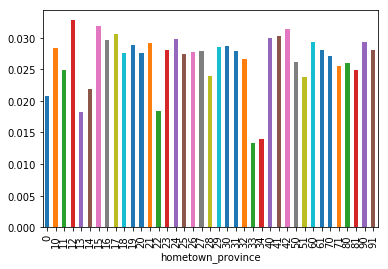

In [145]:
htpMean['mean'].plot('bar')

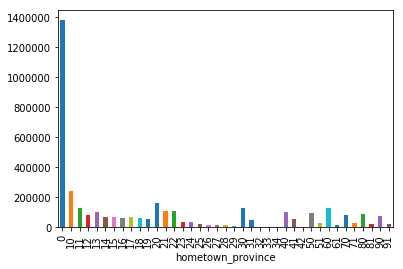

In [146]:
htpMean['size'].plot('bar')

In [147]:
htcMean = dfTrainUser.groupby('hometown_city')['label'].agg(['mean','size'])

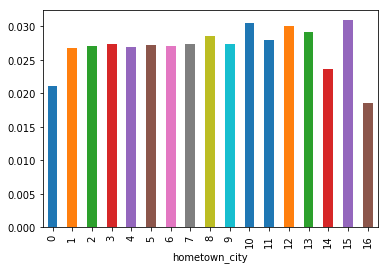

In [148]:
htcMean['mean'].plot('bar')

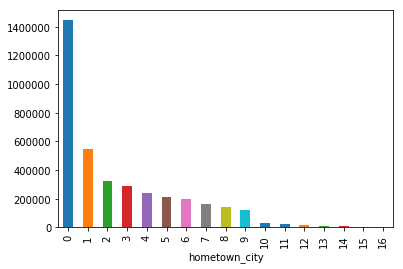

In [149]:
htcMean['size'].plot('bar')

## 常住地(residence)

In [150]:
dfTrainUser["residence_province"] = dfTrainUser['residence'].apply(process_province)
dfTrainUser["residence_city"] = dfTrainUser['residence'].apply(process_city)

## 广告特征
下面开始处理广告特征

App开发者设定的App类目标签，类目标签有两层，使用3位数字编码，百位数表示一级类目，十位个位数表示二级类目，如“210”表示一级类目编号为2，二级类目编号为10，类目未知或者无法获取时，标记为0。

In [151]:
dfAd.head()

,creativeID,adID,camgaignID,advertiserID,appID,appPlatform
0,4079,2318,147,80,14,2
1,4565,3593,632,3,465,1
2,3170,1593,205,54,389,1
3,6566,2390,205,54,389,1
4,5187,411,564,3,465,1


In [152]:
dfAppCat.head()

,appID,appCategory
0,14,2
1,25,203
2,68,104
3,75,402
4,83,203


In [153]:
dfAdAppCat = pd.merge(dfAd,dfAppCat,on='appID')

In [154]:
assert dfAd.shape[0] == dfAdAppCat.shape[0]

In [155]:
#第一类编码
def categories_process_first_class(cate):
    cate = str(cate)
    if len(cate)==1:
        if int(cate)==0:
            return 0
    else:
        return int(cate[0])

#第2类编码
def categories_process_second_class(cate):
    cate = str(cate)
    if len(cate)<3:
        return 0
    else:
        return int(cate[1:])

In [156]:
dfAdAppCat["app_categories_first_class"] = dfAdAppCat['appCategory'].apply(categories_process_first_class)
dfAdAppCat["app_categories_second_class"] = dfAdAppCat['appCategory'].apply(categories_process_second_class)

In [157]:
dfTrainUserAd = pd.merge(dfTrainUser,dfAdAppCat,on='creativeID')

In [158]:
assert dfTrainUserAd.shape[0] == dfTrainUser.shape[0]

## 账户ID(advertiserID)

In [161]:
dfTrainUserAd.advertiserID.unique().shape # 我们有89个类别

(89,)

In [163]:
aIDMean = dfTrainUserAd.groupby('advertiserID')['label'].agg(['mean','size'])

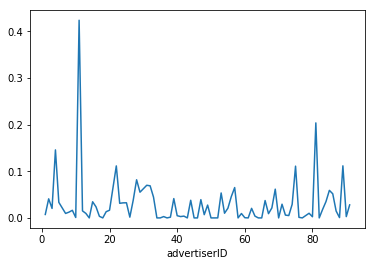

In [165]:
aIDMean['mean'].plot()

In [174]:
aIDMean[aIDMean['mean']  == aIDMean['mean'].max()] # 11 号广告主点击率最高

,mean,size
advertiserID,,
11,0.423841,151


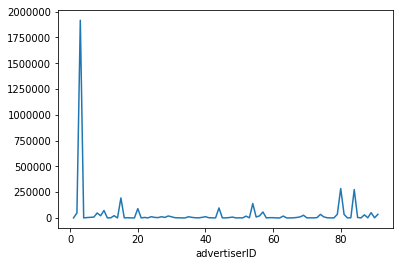

In [166]:
aIDMean['size'].plot()

In [173]:
aIDMean[aIDMean['size']  == aIDMean['size'].max()] # 3 号广告主最多

,mean,size
advertiserID,,
3,0.020328,1916646


In [175]:
# dfTrainUserAd.shape[0]

3749528

## 推广计划ID(camgaignID)

In [178]:
dfTrainUserAd.camgaignID.unique().shape # 我们有 677 个类别

(677,)

## 广告ID(adID)

In [179]:
dfTrainUserAd.adID.unique().shape # 我们有 3447 个类别

(3447,)

## 素材ID(creativeID)

In [180]:
dfTrainUserAd.creativeID.unique().shape ## 我们有 6315 个类别

(6315,)

## AppID(appID)

In [181]:
dfTrainUserAd.appID.unique().shape ## 我们有 50 个类别

(50,)

## App分类(appCategory) 第一级

In [183]:
dfTrainUserAd.app_categories_first_class.unique().shape # 

(7,)

## App分类(appCategory) 第二级

In [185]:
dfTrainUserAd.app_categories_second_class.unique().shape # 

(9,)

## App平台(appPlatform)

In [186]:
dfTrainUserAd.appPlatform.unique().shape

(2,)

下面想统计下一个信息，即不同的广告主下面的推广计划是否会重复

In [191]:
adC =  dfTrainUserAd.groupby(['advertiserID','camgaignID'])['label'].agg(['mean','size'])

In [202]:
adC.shape

(677, 2)

我们发现 677 刚好等于 推广计划ID(camgaignID) 的类别数，说明每个广告主下面的 camgaignID 都不同

In [203]:
adCsd =  dfTrainUserAd.groupby(['advertiserID','camgaignID','adID'])['label'].agg(['mean','size'])

In [204]:
adCsd.shape

(3447, 2)

我们发现 3447 刚好等于 广告ID(adID) 的类别数，说明每个推广计划下面的 adID 都不同

## 位置特征

![](http://static.zybuluo.com/zhuanxu/pok8te5s9g4zb6attj5wyco3/image_1caq5qkehnfi1eo1b59q1o13fum.png)

In [206]:
dfPosition.head()

,positionID,sitesetID,positionType
0,2150,1,0
1,2579,1,0
2,3322,1,0
3,5726,1,0
4,4522,2,0


In [207]:
dfTrainUserAdPos = pd.merge(dfTrainUserAd,dfPosition,on='positionID')

In [208]:
assert dfTrainUserAdPos.shape[0] == dfTrainUserAdPos.shape[0]

## 站点集合ID(sitesetID)

In [209]:
dfTrainUserAdPos.sitesetID.unique().shape ## 我们有 6315 个类别

(3,)

In [210]:
siteMean = dfTrainUserAdPos.groupby('sitesetID')['label'].agg(['mean','size'])

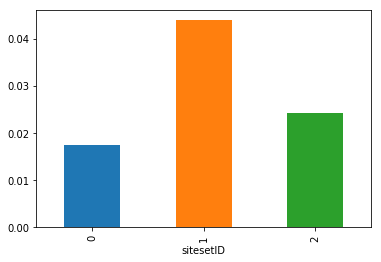

In [211]:
siteMean['mean'].plot('bar')

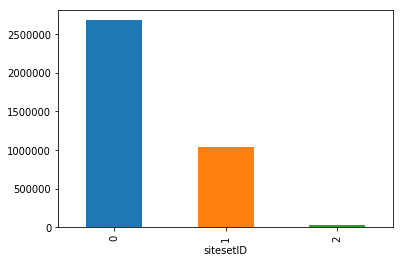

In [212]:
siteMean['size'].plot('bar')

## 广告位类型(positionType)
广告位类型 这个字段区分性非常好

In [213]:
pTMean = dfTrainUserAdPos.groupby('positionType')['label'].agg(['mean','size'])

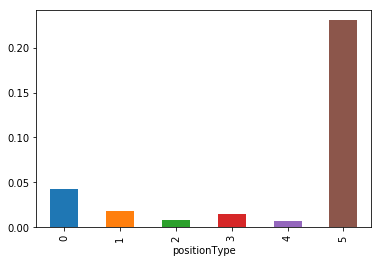

In [214]:
pTMean['mean'].plot('bar')

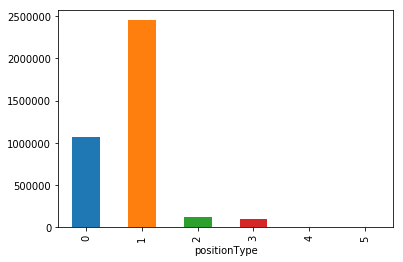

In [215]:
pTMean['size'].plot('bar')

In [216]:
pTMean

,mean,size
positionType,,
0,0.042585,1074114
1,0.018082,2450491
2,0.008455,119095
3,0.014851,98917
4,0.007534,3849
5,0.230242,3062


## 联网方式(connectionType)
这个字段的区分性也不错

In [217]:
cTMean = dfTrainUserAdPos.groupby('connectionType')['label'].agg(['mean','size'])

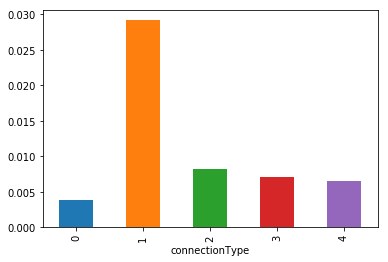

In [218]:
cTMean['mean'].plot('bar')

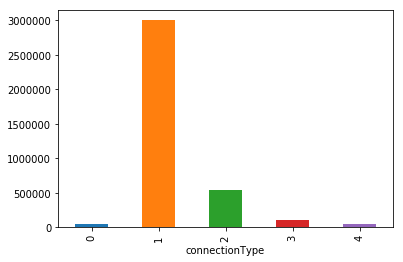

In [219]:
cTMean['size'].plot('bar')

## 运营商(telecomsOperator)

In [220]:
toMean = dfTrainUserAdPos.groupby('telecomsOperator')['label'].agg(['mean','size'])

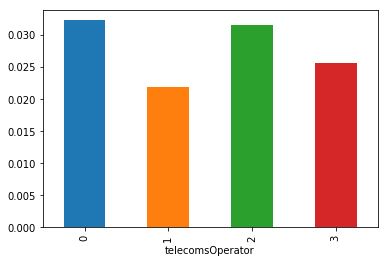

In [221]:
toMean['mean'].plot('bar')

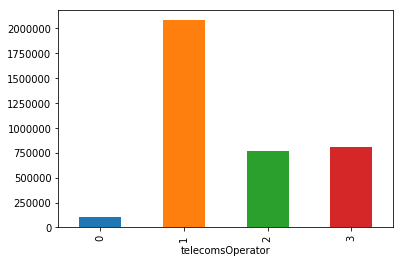

In [222]:
toMean['size'].plot('bar')

## 时间特征
clickTime，conversionTime，installTime，格式均为DDHHMM，其中DD代表第几天，HH代表小时，MM代表分钟。

In [232]:
# 哪天
def get_day(t):
    t = str(t)
    t=int(t[0:2])
    return t
def get_hour(t):
    t = str(t)
    t=int(t[2:4])
    return t
def get_minute(t):
    t = str(t)
    t=int(t[4:6])
    return t

In [230]:
dfTrainUserAdPos['day'] = dfTrainUserAdPos['clickTime'].apply(get_day)

In [237]:
dfTrainUserAdPos['hour'] = dfTrainUserAdPos['clickTime'].apply(get_hour)
dfTrainUserAdPos['minute'] = dfTrainUserAdPos['clickTime'].apply(get_minute)

## 天特征

In [239]:
dayMean = dfTrainUserAdPos.groupby('day')['label'].agg(['mean','size'])

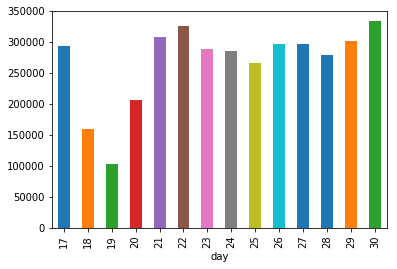

In [240]:
dayMean['size'].plot('bar')

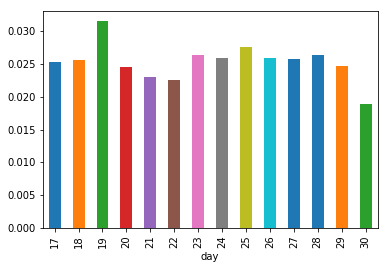

In [241]:
dayMean['mean'].plot('bar')

## 小时

In [242]:
myMean = dfTrainUserAdPos.groupby('hour')['label'].agg(['mean','size'])
# myMean['size'].plot('bar')
# myMean['mean'].plot('bar')

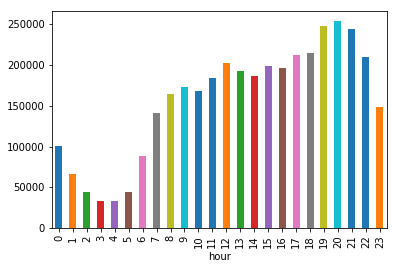

In [243]:
myMean['size'].plot('bar')

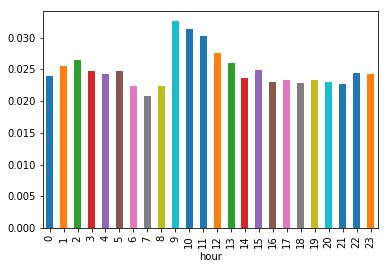

In [244]:
myMean['mean'].plot('bar')

## 分钟

In [245]:
myMean = dfTrainUserAdPos.groupby('minute')['label'].agg(['mean','size'])
# myMean['size'].plot('bar')
# myMean['mean'].plot('bar')

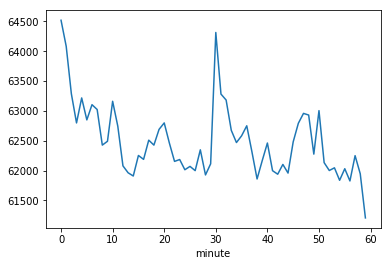

In [247]:
myMean['size'].plot()

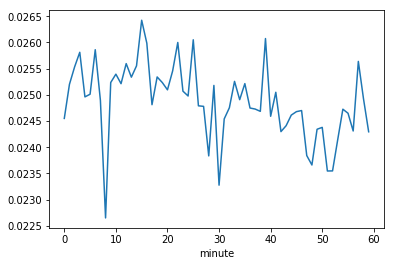

In [248]:
myMean['mean'].plot()

## 总结
总结下目前所有的字段，已经每个字段如何处理

In [224]:
dfTrainUserAdPos.columns.values

array(['label', 'clickTime', 'conversionTime', 'creativeID', 'userID',
       'positionID', 'connectionType', 'telecomsOperator', 'age',
       'gender', 'education', 'marriageStatus', 'haveBaby', 'hometown',
       'residence', 'hometown_province', 'hometown_city',
       'residence_province', 'residence_city', 'adID', 'camgaignID',
       'advertiserID', 'appID', 'appPlatform', 'appCategory',
       'app_categories_first_class', 'app_categories_second_class',
       'sitesetID', 'positionType'], dtype=object)

In [226]:
for column in dfTrainUserAdPos.columns:
    print(column,":", dfTrainUserAdPos[column].unique().shape[0])

label : 2
clickTime : 20160
conversionTime : 18207
creativeID : 6315
userID : 2595627
positionID : 7219
connectionType : 5
telecomsOperator : 4
age : 81
gender : 3
education : 8
marriageStatus : 4
haveBaby : 7
hometown : 365
residence : 399
hometown_province : 39
hometown_city : 17
residence_province : 39
residence_city : 19
adID : 3447
camgaignID : 677
advertiserID : 89
appID : 50
appPlatform : 2
appCategory : 14
app_categories_first_class : 7
app_categories_second_class : 9
sitesetID : 3
positionType : 6


我们可以发现除了 clickTime、conversionTime 外，其他都是类别型变量

但是这些类别性变量中：
```
clickTime : 20160
conversionTime : 18207
creativeID : 6315
userID : 2595627
positionID : 7219
hometown : 365
residence : 399
adID : 3447
camgaignID : 677
```
这些变量都是高基数的特征，我们不能简单的用one-hot的方法，我们可以用均值编码

此时我们做完所有的特征工程后，就可以用最简单的lr了。

In [249]:
dfTrainUserAdPos.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,age,gender,...,appID,appPlatform,appCategory,app_categories_first_class,app_categories_second_class,sitesetID,positionType,day,hour,minute
0,0,170000,NaN,3089,2798058,293,1,1,25,2,...,434,1,108,1.0,8,0,3,17,0,0
1,0,180028,NaN,3089,1683269,293,2,3,20,2,...,434,1,108,1.0,8,0,3,18,0,28
2,0,191045,NaN,3089,240899,293,1,2,19,2,...,434,1,108,1.0,8,0,3,19,10,45
3,0,212224,NaN,1004,1849771,293,2,2,17,2,...,465,1,209,2.0,9,0,3,21,22,24
4,0,171015,NaN,1004,1253240,293,2,1,19,2,...,465,1,209,2.0,9,0,3,17,10,15


In [251]:
# 下面我们来写代码，处理值的one-hot编码

In [252]:
testDf = dfTrainUserAdPos.head()

In [265]:
testDf['telecomsOperator']

0    1
1    3
2    2
3    2
4    1
Name: telecomsOperator, dtype: int64

In [274]:
a = pd.get_dummies(testDf["telecomsOperator"],prefix="telecomsOperator",sparse=True)
b =  pd.get_dummies(testDf["connectionType"],prefix="connectionType",sparse=True)

In [272]:
# hasattr(a, "tocsr")

False

In [273]:
from scipy import sparse

In [277]:
aa = sparse.hstack([a,b])

In [278]:
hasattr(aa, "tocsr")

True

In [286]:
aaCsr = aa.tocsc()

In [ ]:
y = np.array([1,0,1,0,1])

In [295]:
y_df = pd.DataFrame(data={'y':y})

In [296]:
y_df

,y
0,1
1,0
2,1
3,0
4,1


In [299]:
np.where(y_df.y>0)

(array([0, 2, 4]),)

In [293]:
np.where(y>0)

(array([0, 2, 4]),)

In [301]:
aaCsr[np.where(y_df.y==0)]

<2x5 sparse matrix of type '<class 'numpy.uint8'>'
	with 4 stored elements in Compressed Sparse Column format>

In [287]:
aaCsr

array([[1, 0, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 0, 1],
       [1, 0, 0, 0, 1]], dtype=uint8)

In [281]:
aa.tocsr().toarray()

array([[1, 0, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 0, 1],
       [1, 0, 0, 0, 1]], dtype=uint8)

In [283]:
pd.concat([a,b],axis=1)

,telecomsOperator_1,telecomsOperator_2,telecomsOperator_3,connectionType_1,connectionType_2
0,1,0,0,1,0
1,0,0,1,0,1
2,0,1,0,1,0
3,0,1,0,0,1
4,1,0,0,0,1
